Define Wells and Data Paths

In [2]:
WELLS = ["CCS1", "VW1"]
FORMATIONS = [ #comment out formations you don't want to look at
    "Eau Claire",
    "Mt. Simon E",
    "Mt. Simon D",
    "Mt. Simon C",
    "Mt. Simon B",
    "Mt. Simon A",
    "Argenta",
    "Precambrian"
    ]


DATALOGS_PATH = "REU Project/Data/Raw CSV Files/raw_"
LABELS_PATH = "REU Project/Data/labels/label_"

Imports

In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Get Dataset and Scale it

In [5]:
datalogs = {}
labels = {}
datasets = {}
for well in WELLS:
  datalogs_df = pd.read_csv(DATALOGS_PATH + well + ".csv")
  labels_df = pd.read_csv(LABELS_PATH + well + ".csv")

  datalogs_df = datalogs_df[datalogs_df["FORM"].isin(FORMATIONS)]

  datalogs[well] = datalogs_df
  print(well + " " + str(datalogs_df.shape))
  labels[well] = labels_df

  dataset = pd.merge(datalogs_df, labels_df, on='DEPT')
  dataset['WELL'] = well  # Add a 'Well' column to identify the well
  datasets[well] = dataset

data = pd.concat(datasets.values())
print("Concatenated" + " " + str(datalogs_df.shape))

#scale data
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data.drop(
    ['DEPT', 'WELL', 'HAS_FRAC', 'FORM'], axis=1))

CCS1 (4217, 24)
VW1 (3999, 24)
Concatenated (3999, 24)


Create PCA

In [6]:
pca = PCA()
#compute math and return output coordinates
pca_data = pca.fit_transform(scaled_data)

Calculate and Graph Scree Plot

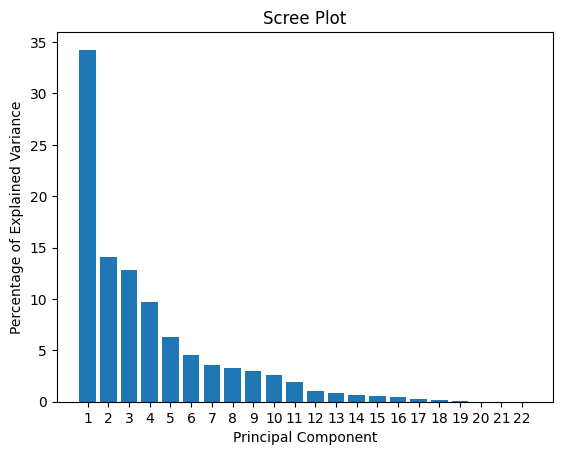

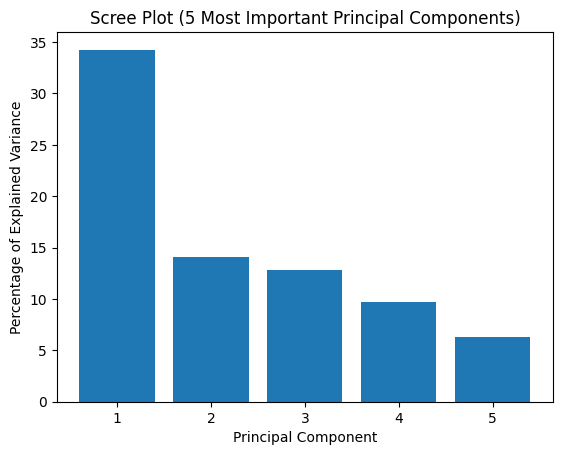

In [8]:
#calculate % of variation that each principal component account for
per_var = pca.explained_variance_ratio_ * 100
#create label for each principal component for scree plot
labels = [str(i) for i in range(1, len(per_var) + 1)]

#graph scree plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

#graph scree plot with most important 5 principal components
plt.bar(x=range(1,6), height=per_var[:5], tick_label=labels[:5])
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot (5 Most Important Principal Components)")
plt.show()


Plot Cumulative Explained Variance

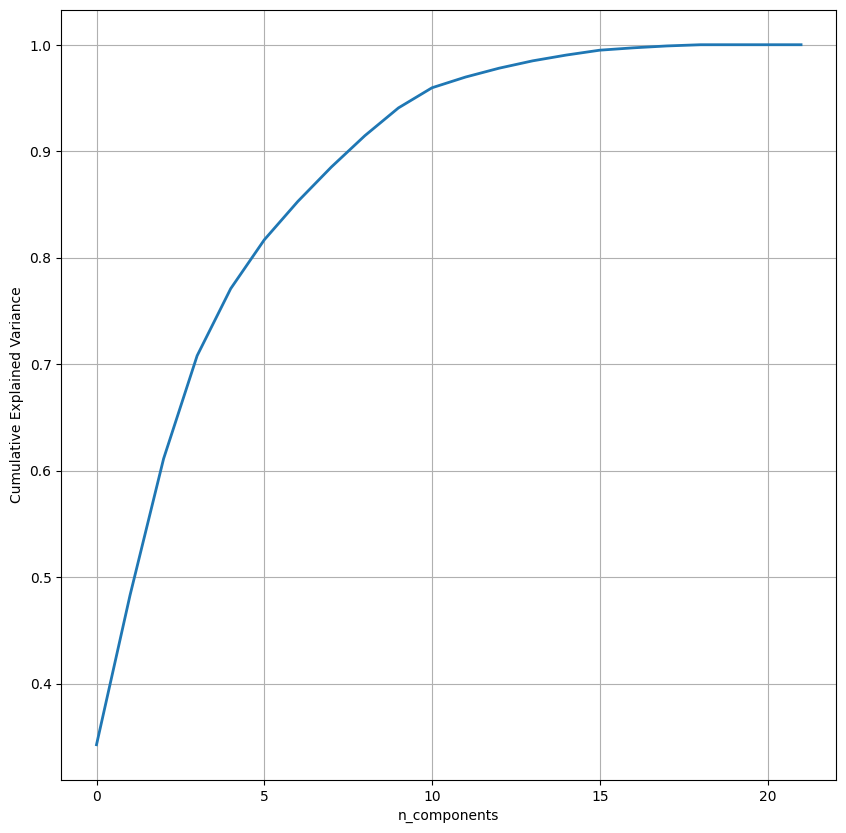

In [9]:
variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cumulative_variance_explained = np.cumsum(variance_explained)

plt.figure(figsize=(10, 10))

plt.plot(cumulative_variance_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Make PCA Plot

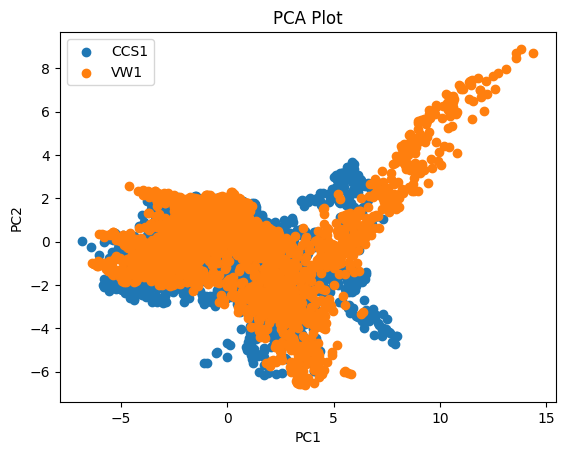

In [12]:
#put new coordinates in matrix where rows have sample labels and columns have
#PC labels
pca_df = pd.DataFrame(pca_data,
                      columns=[f'PC{i}' for i in range(1, data.shape[1] - 3)])
pca_df['WELL'] = data['WELL'].values

#make scatter plot colored by well
for well in WELLS:
    plt.scatter(pca_df.loc[pca_df['WELL'] == well, 'PC1'],
                pca_df.loc[pca_df['WELL'] == well, 'PC2'], label=well)
plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.show()

Determine which features had largest influence on PC1 (principal component that
explains the most variance)

In [15]:
#loading scores of PC1 (measure of influence)
loading_scores = pd.Series(pca.components_[0],
     index = data.drop(['DEPT', 'WELL', 'HAS_FRAC', 'FORM'], axis=1).columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_features = sorted_loading_scores[:].index.values
print(loading_scores[sorted_features])

RHOZ           0.321591
XWATER        -0.296989
UWATER        -0.296989
PIGE          -0.296967
DTCO          -0.251488
BOUND_WATER    0.245328
KAOLINITE      0.238139
RLA5           0.216638
RLA4           0.215954
RLA3           0.214752
CHLORITE       0.189747
PYRITE         0.188145
XIWATER       -0.185745
ILLITE         0.183985
RXOZ           0.181520
RLA2           0.176889
DTSM          -0.175152
KSDR_PY       -0.140834
K-FELDSPAR     0.130369
N-FELDSPAR     0.122954
QUARTZ        -0.117436
DOLOMITE       0.108377
dtype: float64


Determine which features had largest influence on top 5 most influential principal components

In [16]:
for i in range(5):
  print(f"\nPC{i+1}:")
  loading_scores = pd.Series(pca.components_[i], index = data.drop(
   ['DEPT', 'WELL', 'HAS_FRAC', 'FORM'], axis=1).columns)
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
  sorted_features = sorted_loading_scores[:].index.values
  print(loading_scores[sorted_features][:5])


PC1:
RHOZ      0.321591
XWATER   -0.296989
UWATER   -0.296989
PIGE     -0.296967
DTCO     -0.251488
dtype: float64

PC2:
K-FELDSPAR    -0.418706
DTSM          -0.380426
DTCO          -0.293867
QUARTZ         0.286748
BOUND_WATER   -0.285821
dtype: float64

PC3:
RLA3    0.338650
RXOZ    0.334087
RLA2    0.325544
RLA5    0.295341
RLA4    0.277357
dtype: float64

PC4:
DOLOMITE       0.581980
QUARTZ        -0.425935
ILLITE        -0.380056
BOUND_WATER   -0.289413
RLA2          -0.207535
dtype: float64

PC5:
XIWATER    -0.527741
KSDR_PY     0.408294
CHLORITE    0.280465
PIGE        0.239068
UWATER      0.238998
dtype: float64
